# Import Modules

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data File and Exploration

In [75]:
# US domestic flights from 1990 to 2009
file_path = '/Users/mini/Documents/swd_challenges/dec_18_submission/chimps_16091-2010-08-03_17-08-31/flight_edges.tsv'

headers = ['Origin', 'Destination', 'Origin City', 'Destination City', 'Passengers', \
          'Seats', 'Flights', 'Distance', 'Fly Date', 'Origin Population' \
          , 'Destination Population']

"""
3 Letter aiport codes for Origin and Destination
Passengers - Number of passengers transported on flight
Seats - Number of seats availalbe
Flights - Number of flights between origin and destination (multiple records for one month, many with flights > 1)
Distance - to the nearest mile
Fly date - YYYYMM
Populations are according to US Cenus data
"""

'\n3 Letter aiport codes for Origin and Destination\nPassengers - Number of passengers transported on flight\nSeats - Number of seats availalbe\nFlights - Number of flights between origin and destination (multiple records for one month, many with flights > 1)\nDistance - to the nearest mile\nFly date - YYYYMM\nPopulations are according to US Cenus data\n'

In [76]:
df = pd.read_csv(file_path, sep='\t', names=headers)

In [77]:
df.head(n=10)

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156.0,199003,147300,76034
6,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156.0,199001,147300,76034
7,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156.0,199009,147300,76034
8,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156.0,199011,147300,76034
9,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228.0,199002,5154164,76034


In [78]:
print(list(df)) # list columns
#list(df)[0] # week of data collection
#list(df)[1] # search value, country

['Origin', 'Destination', 'Origin City', 'Destination City', 'Passengers', 'Seats', 'Flights', 'Distance', 'Fly Date', 'Origin Population', 'Destination Population']


In [79]:
len(df) # check how many rows

3606803

In [80]:
df.dtypes # Check data types

Origin                     object
Destination                object
Origin City                object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Fly Date                    int64
Origin Population           int64
Destination Population      int64
dtype: object

In [81]:
#df_fly_dates = df[['Fly Date', 'Flights']]
#df_fly_dates.head(n=5)
df_by_dates = df.groupby('Fly Date').sum().reset_index()

In [98]:
df_by_dates.head(n=5)

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
0,199001,27605138,55539260,422366,7827975.0,70916223552,71693626139
1,199002,27010787,49894444,379961,7684717.0,69596807481,68886987291
2,199003,32948359,56465593,429472,7635153.0,68680523618,68189402036
3,199004,31177552,55149836,420019,7359825.0,66817182721,65762943942
4,199005,31203382,56815046,435517,7645908.0,70626316107,71946129031


In [83]:
df_by_dates.head(n=5)

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
0,199001,27605138,55539260,422366,7827975.0,70916223552,71693626139
1,199002,27010787,49894444,379961,7684717.0,69596807481,68886987291
2,199003,32948359,56465593,429472,7635153.0,68680523618,68189402036
3,199004,31177552,55149836,420019,7359825.0,66817182721,65762943942
4,199005,31203382,56815046,435517,7645908.0,70626316107,71946129031


In [84]:
list(df_by_dates)

['Fly Date',
 'Passengers',
 'Seats',
 'Flights',
 'Distance',
 'Origin Population',
 'Destination Population']

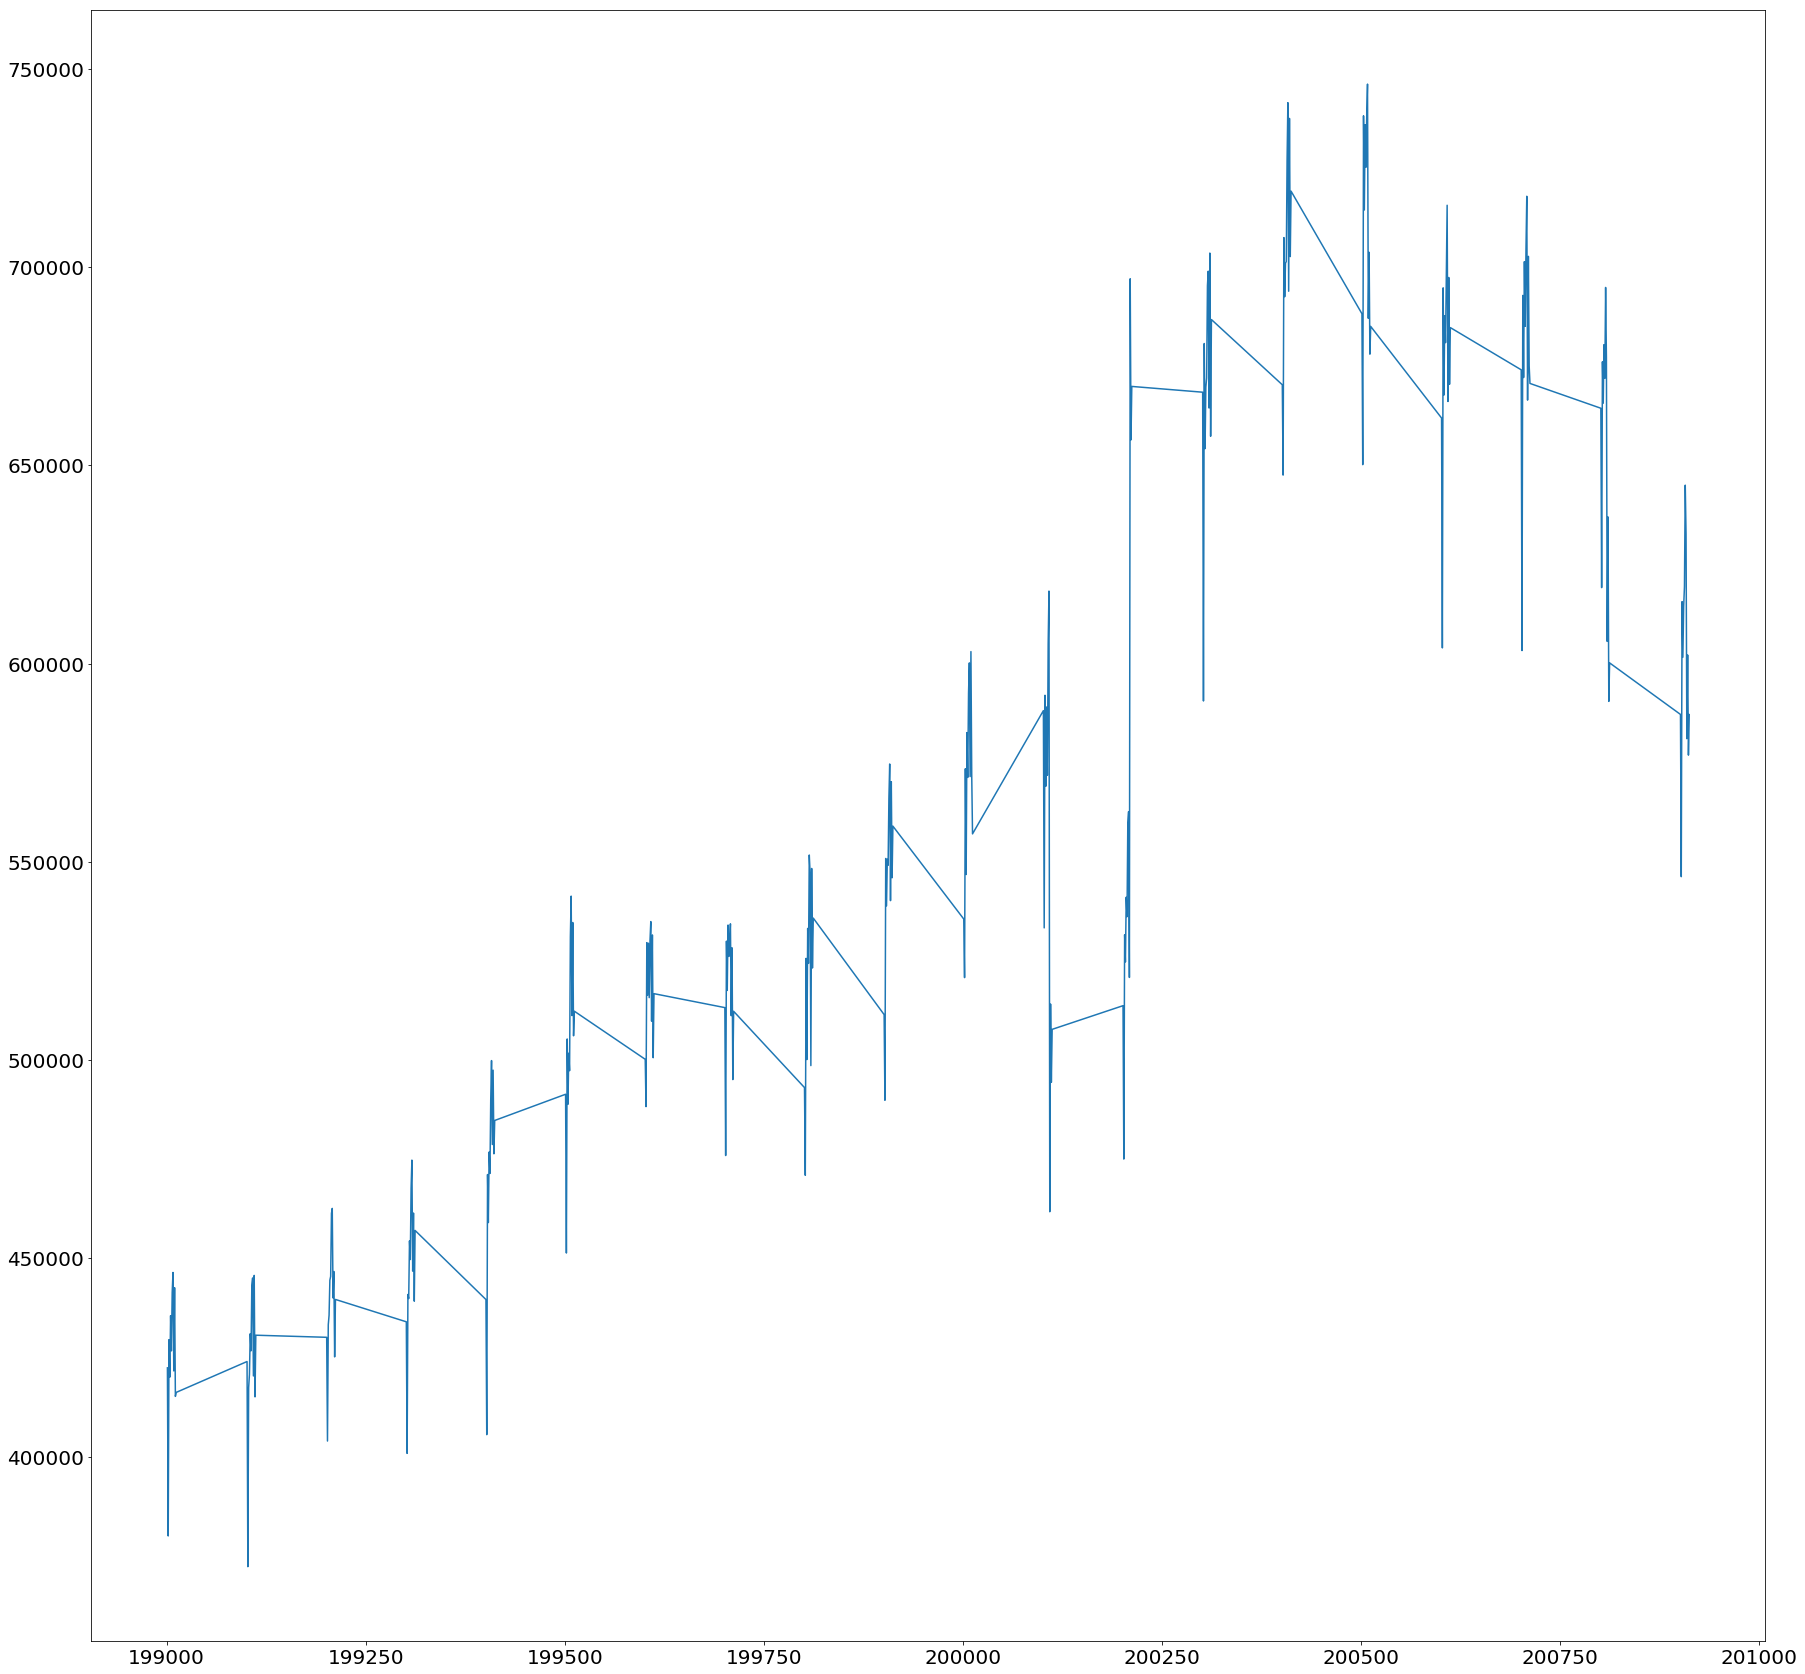

In [88]:
x = df_by_dates['Fly Date']
y = df_by_dates['Flights']

plt.plot(x,y)
plt.rcParams['figure.figsize'] = [30,30]
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=10)
plt.show()

In [96]:
last_3_yrs = df_by_dates[df_by_dates['Fly Date'] >= 200700]

In [95]:
last_3_yrs

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population


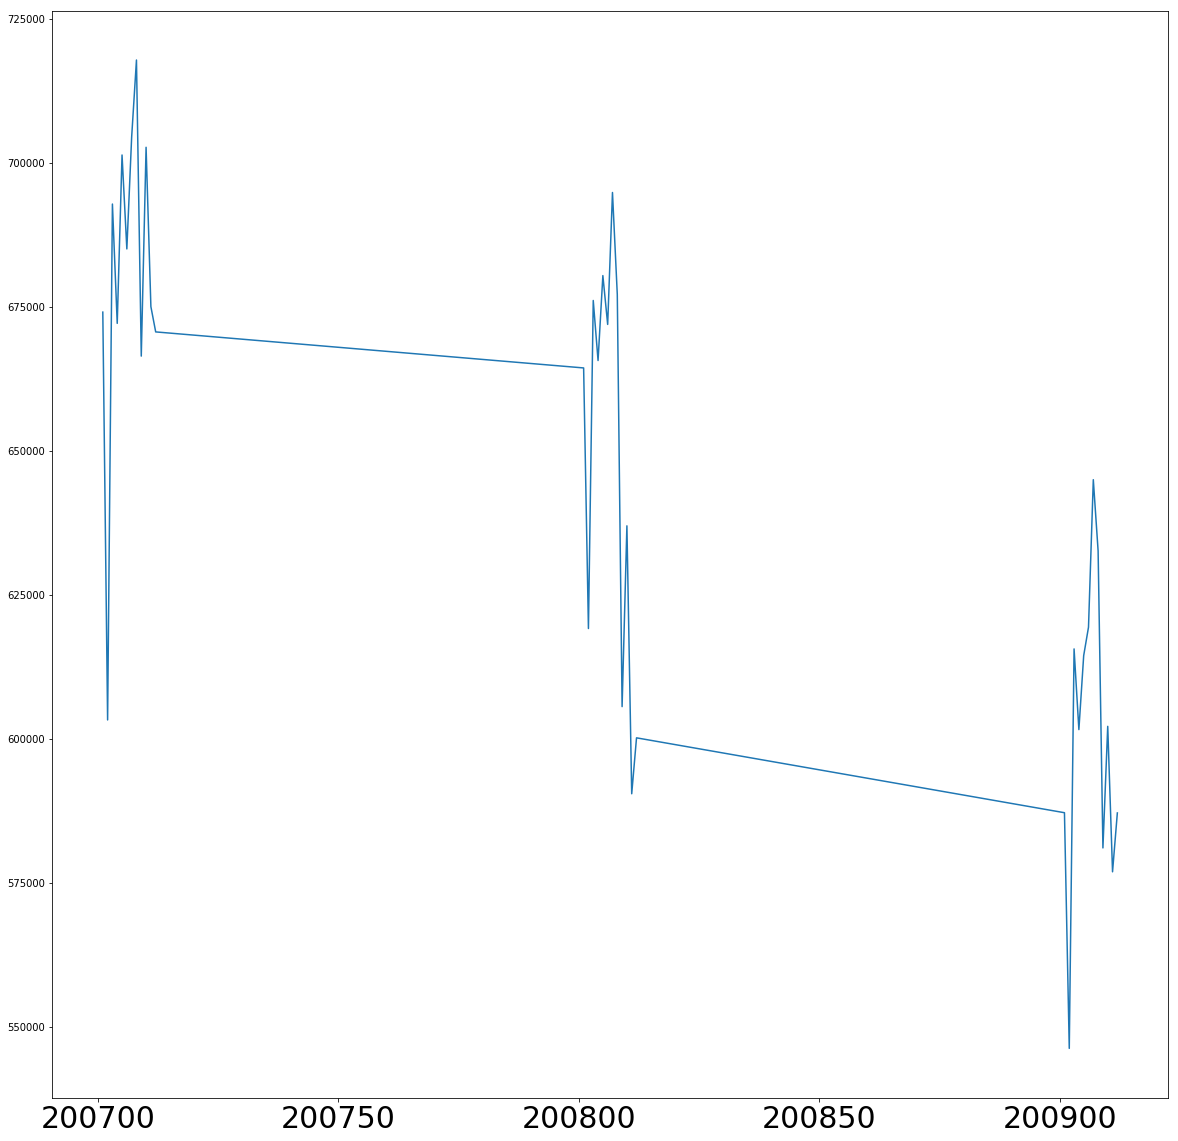

In [97]:
x = last_3_yrs['Fly Date']
y = last_3_yrs['Flights']

plt.plot(x,y)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

In [ ]:
# Group by origin AND destination city - maybe bar charts for both?